In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
#SQLAlchemy Create Engine: set up the ability to query a SQLite database.
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

#SQLAlchemy Automap Base: creates a base class for an automap schema in SQLAlchemy
Base = automap_base()

In [7]:
# reflect the tables

#SQLAlchemy Reflect Tables: reflect the schema of SQLite tables into code and create mappings.
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found

#View Classes Found by Automap: This code references the classes that were mapped in each table.
#Base.classes gives us access to all the classes.
#keys() references all the names of the classes.
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table

# Create new variables for Measurement and Station (that we don't need to type lenghty commands).
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB

#An SQLAlchemy Session to query database
session = Session(engine)

# Exploratory Climate Analysis

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text major ticklabel objects>)

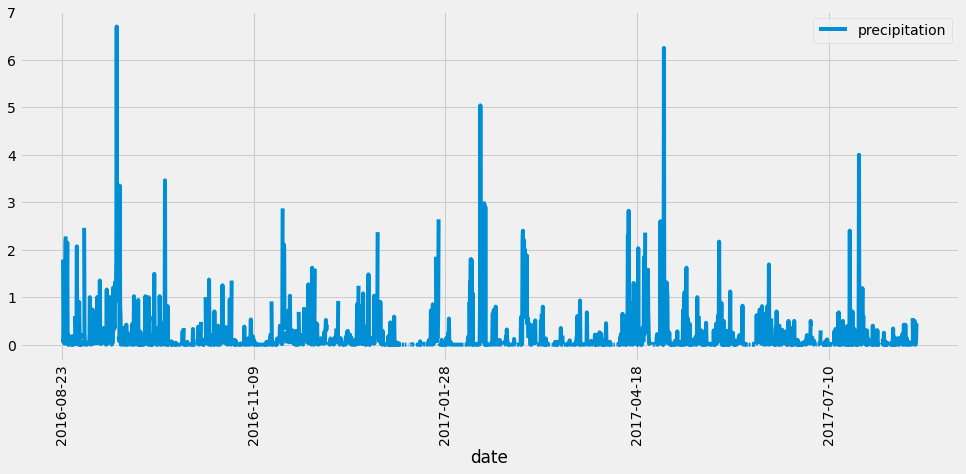

In [66]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. (Find the Date One Year Ago)
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set. (This function allows us to trace back a certain number of days.)
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
# (1) results = session.query(Measurement.date, Measurement.prcp)

#print all the result
#print(results.all())

#filter out the data
# (2) results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

#extracts all of the results from our query and put them in a list (3)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

#print the result
#print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])

#variable inplace to specify whether or not we want to create a new DataFrame
df.set_index(df['date'], inplace=True)
#print(df)

#  print the dataframe without the index
#print(df.to_string(index=False))

# Sort the dataframe by date
df = df.sort_index()
#rint(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data

df.plot(figsize=(15, 6))
plt.xticks(rotation=90)
#plt.xticks(np.arange(2016-8-23, 2017-7-10, step=10))
#plt.xticks(np.arange(min, max+1, 1.0))
#plt.xticks(range(0,len(df.index)),xlabels,rotation=45)
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [47]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [51]:
# What are the most active stations?
# List the stations and the counts in descending order.
# step 1: START with the function for query
# session.query()
# step 2: ADD a few PARAMETERS to our query
# session.query(Measurement.station, func.count(Measurement.station))
# step 3: ADD a few FILTERS to narrow down the data to show only what we need using GROUPBY() method
# session.query(Measurement.station, func.count(Measurement.station)).\ 
    #group_by(Measurement.station)
# step 4: ORDER results in the order that we specify, in this case, descending order
# session.query(Measurement.station, func.count(Measurement.station)).\
#group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
# step 5: add the .all() function. This will return all of the results of our query
# session.query(Measurement.station, func.count(Measurement.station)).\
# group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [68]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# step 1: session.query()
# step 2: calculate the minimum, maximum, and average temperatures: 
#session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))
#step 3:filtering out everything but we need, by ID:
# session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
#filter(Measurement.station == 'USC00519281')
# step 4: add all to return results in a list
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

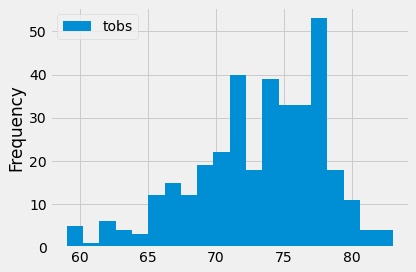

In [79]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
#print(results)

#convert the results to a DataFrame
df = pd.DataFrame(results, columns=['tobs'])
#print(df)

#plot the data with 12 bins
df.plot.hist(bins=12)

#we can compress the x-axis labels so that they fit into the box holding
plt.tight_layout()

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge